<a href="https://colab.research.google.com/github/karishmasd/Neural_Networks/blob/main/Planar_data_classification_with_1_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOAL:

*   Implementing a 2-class classification neural network with a single hidden layer
*   Use units with a non-linear activation function, such as tanh
*   Compute the cross entropy loss
*   Implement forward and backward propagation


In [2]:
import numpy as np                # for scientific calculation
import sklearn                    #for data mining and data analysis
import matplotlib.pyplot as plt   #for visualization
%matplotlib inline                # for in notebook dispay

UsageError: unrecognized arguments: # for in notebook dispay


for data set

In [44]:
def planar_flower_dataset():
    np.random.seed(100)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


loading the data set

In [45]:
X,Y =planar_flower_dataset()
#print(X,Y)

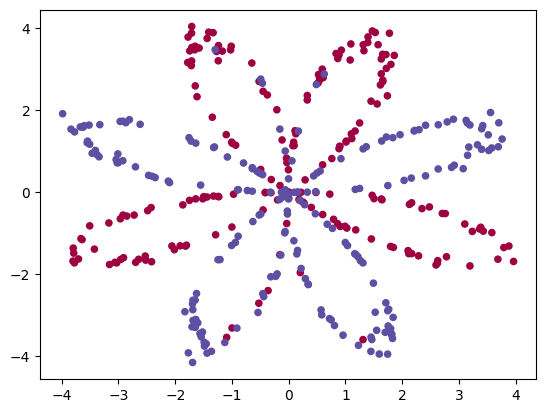

In [46]:
plt.scatter(X[0,:],X[1,:],c=Y,s=20,cmap=plt.cm.Spectral);

plt.scatter(): Creates a scatter plot with customizable positions, colors, and sizes.


X[0, :]: X-coordinates (first row of X).


X[1, :]: Y-coordinates (second row of X).


c=Y: Colors points based on Y values.


s=40: Marker size set to 40.


cmap=plt.cm.Spectral: Uses the "Spectral" colormap for distinct colors.


In [47]:
m=np.shape(X)[1]
m

400

In [48]:
shape_X=np.shape(X)
shape_Y=np.shape(Y)
print(shape_X,shape_Y)

(2, 400) (1, 400)


#Simple logistic regression

we can use sklearn's  inbuilt function

In [49]:
lr=sklearn.linear_model.LogisticRegression();
lr.fit(X.T,Y.T.ravel());
#sklearn logistic regression expects the y to be in the form of (400,) our y is Y.T that is (400,1) so we use ravel() to transform

#function to plot decision boundary

In [50]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'Logistic Regression')

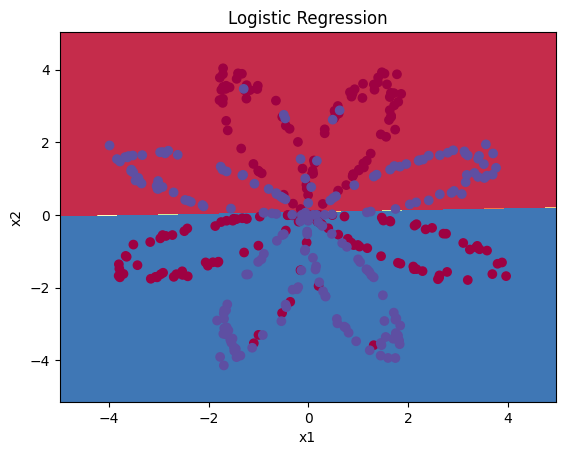

In [51]:
plot_decision_boundary(lambda x: lr.predict(x), X, Y)
plt.title("Logistic Regression")

In [52]:
LR_predictions = lr.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 48 % (percentage of correctly labelled datapoints)


<ipython-input-52-0fa869128920>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
